# Tutorial: FashionMNIST

https://www.kaggle.com/code/saaisudarsanand/learn-pytorch-simple-neural-network
https://github.com/pranay414/Fashion-MNIST-Pytorch/blob/master/fashion_mnist.ipynb

In [1]:
# Import the necessary libraries
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
import lovely_tensors as lt 
# GPU check
import humanize
import psutil
import os
import GPUtil as GPU
from tqdm import trange, tqdm

lt.monkey_patch() #global settting so everyting uses lovely_tensors

In [2]:
# Import all relevant torch modules
import torch.optim as optim # HAS TORCH OPTIMISER FUNCTIONS LIKE ADAM, SGD,ETC;
# torch.optim.Optimizer(params, defaults) => Base class for all optimizers.
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch import nn
import torch.nn.functional as F # HAS NON-PARAMETER FUNCTIONS (RELU, SOFTMAX ETC;)
from torch.utils.data import Dataset, DataLoader # Helps us load data

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if str(device) == "cpu":
    print("No GPU selected")

#GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
#gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("CPU usage per core: ", psutil.cpu_percent(interval=1, percpu=True))
 #print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm()
     

No GPU selected
Gen RAM Free: 131.7 GB  | Proc size: 288.1 MB
CPU usage per core:  [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [4]:
#Define a Torch transformer which converts ubyte informations into otrch Tensor
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5)) # not  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) beacause it is greyscale
                               ])

#load actual Dataset:
trainingset = FashionMNIST("./", train= True, download= True, transform= transform) 

testset = FashionMNIST("./", train= False, download= True, transform= transform)

print(trainingset)
print(type(trainingset))

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )
<class 'torchvision.datasets.mnist.FashionMNIST'>


Since the trainingset is still a Dataset object it is still not easy accessable so we need a Dataloader torch.utils.data.DataLoader

In [5]:
trainloader = DataLoader(trainingset,batch_size = 64, shuffle = True) # load dataset into chuncks of 64 pictures + shuffle the loaded pictures
testloader = DataLoader(testset, batch_size = 64, shuffle = True)
print(trainloader)
print(len(trainloader), len(testloader)) 

#
#
# vorteil aufteilung vorgefertigte aufteilunf in test und trainingsset durch pytorch 
#
#

938 157


Now the DataLoader is still a Torch Object but luckely now it is iterable.
So lets Try to iterate over it:

In [6]:
for i,j in enumerate(trainloader):
    print(i, j)
print("\n")
print(f"Total number of batches: {len(trainloader)}")
print(f"Total number of pictures (64 in each batch): {len(trainloader) * 64}")

0 [tensor[64, 1, 28, 28] n=50176 x∈[-1.000, 1.000] μ=-0.473 σ=0.665, tensor[64] i64 x∈[0, 9] μ=4.984 σ=2.597]
1 [tensor[64, 1, 28, 28] n=50176 x∈[-1.000, 1.000] μ=-0.408 σ=0.705, tensor[64] i64 x∈[0, 9] μ=4.406 σ=2.877]
2 [tensor[64, 1, 28, 28] n=50176 x∈[-1.000, 1.000] μ=-0.406 σ=0.723, tensor[64] i64 x∈[0, 9] μ=4.078 σ=2.956]
3 [tensor[64, 1, 28, 28] n=50176 x∈[-1.000, 1.000] μ=-0.425 σ=0.700, tensor[64] i64 x∈[0, 9] μ=4.094 σ=2.804]
4 [tensor[64, 1, 28, 28] n=50176 x∈[-1.000, 1.000] μ=-0.430 σ=0.704, tensor[64] i64 x∈[0, 9] μ=4.609 σ=2.670]
5 [tensor[64, 1, 28, 28] n=50176 x∈[-1.000, 1.000] μ=-0.423 σ=0.713, tensor[64] i64 x∈[0, 9] μ=4.797 σ=2.632]
6 [tensor[64, 1, 28, 28] n=50176 x∈[-1.000, 1.000] μ=-0.421 σ=0.704, tensor[64] i64 x∈[0, 9] μ=4.953 σ=3.052]
7 [tensor[64, 1, 28, 28] n=50176 x∈[-1.000, 1.000] μ=-0.401 σ=0.727, tensor[64] i64 x∈[0, 9] μ=4.531 σ=3.122]
8 [tensor[64, 1, 28, 28] n=50176 x∈[-1.000, 1.000] μ=-0.454 σ=0.691, tensor[64] i64 x∈[0, 9] μ=4.312 σ=3.028]
9 [tensor[

So the pure iteration over the trainloader is an overwhelming mass of data but luckily Python get us covert by using the builtin iter Objects

In [7]:
it = iter(trainloader)
images, labels = next(it)

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


So now maybe we can see such a picture therefore we use lovely tensors

labels: tensor[64] i64 x∈[0, 9] μ=3.875 σ=2.892

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


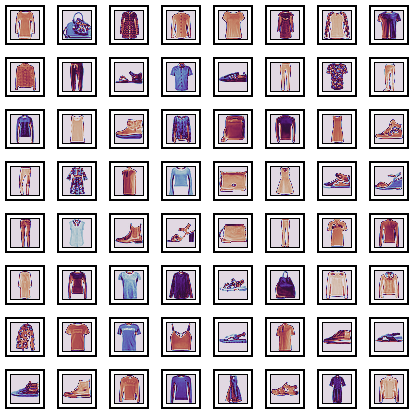

In [8]:
print(f"labels: {labels}\n")
print(trainingset.classes)
print(trainloader)
images.chans #lovely look at 64 pictures

So what we see is that each picture should have a number assigned, which varies between 0 and 9. 
The trainingset also contains information on which element equals to which type of clothing. 
| Clothing   | Number |
| :---------: | :---------: | 
| T-shirt/top      | 0      |
| Trouser  | 1       |
| Pullover  | 2       |
| Dress  | 3       |
| Coat  | 4       |
| Sandal  | 5       |
| Shirt  | 6       |
| Bag  | 7       |
| Ankle boot  | 8       |
| Trouser  | 9       |

So now we can make an assignment to each number for Python.


In [9]:
assignment = {0 : "Tshirt_Top",
              1 : 'Trouser',
              2 : 'Pullover',
              3 : 'Dress',
              4 : 'Coat',
              5 : 'Sandal',
              6 : 'Shirt',
              7 : 'Sneaker',
              8 : 'Bag',
              9 : 'Ankle boot'}

So now we got our data the next step now is to acually build the Neuronal Network. 
At first we want to just define a straight forward NN:
Therefor we need the nn.Module which works like a container for all NN classes.

In [10]:
class simpleNN(nn.Module): 
    def __init__(self, input_size, num_classes) -> None:
        super(simpleNN,self).__init__()
        """
        Define the NN:
        :param: input_size: number of inputs
        :param: num_classes: number of outcoming classes
        super(simpleNN,self).__init__() ensures that oly this class will beloaded if further inheritad
        """
        self.fc1 = nn.Linear(input_size,50) # Fully Connected Layer 1
        self.fc2 = nn.Linear(50,num_classes) # Fully Connected Layer 2

    def forward(self,x):
        # Defines the computation performed at every call (in this case the non liniarity is intocduced after every Layer).
        # Should be overridden by all subclasses.
        # This is the heart of the model, it runs once for every input
        x = F.relu(self.fc1(x)) # Passing the output of fc1 through the relu function 
        x = self.fc2(x) # Passing the relu's output through fc2
        return x # Output is achived as a tensor of shape [10].

Congratulations now you have your NN build. 
But what does it do? 
simpleNN is as is name tells you a very simple Neuronal Network with a number of input_size inputs. 
These inputs will be passed throw two fully connected but hidden layers, the hidden layer one is significantly larger than the hidden layer two. 
The forward function will be calculated with every call of the simpleNN module therefore this brings the Non-linearity by using the ReLU function.

Now we need to define our in and outputs for the Network:

In [11]:
# Set Hyper Parameters
input_size = 784 # number of inputs in this case 28*28=784 since this is the resolution of every picture
num_classes = 10 # our ten outputs t-shirts boots etc
learning_rate = 0.001 # the learning rate for the Loss Optimizer
num_epochs = 10 # number of trys for the optimizer

In [12]:
model = simpleNN(input_size= input_size, num_classes= 10).to(device) # initialize with 784 inputs and 10 outputs
                                                                              # and try to push it to cuda device if possible otherwise fall back to cpu

# Set Loss Function and Optimizer
loss_fn = nn.CrossEntropyLoss() # setup loss function Cross entropy loss is commonly used in classification tasks both in traditional ML and deep learning
optimizer = optim.Adam(model.parameters(),lr=learning_rate) # setup Adam as optimizer because adam isses einfach

Now every thing is definded for use now the only thing left is to train the model:

  0%|          | 0/10 [00:00<?, ?it/s]

Gen RAM Free: 131.7 GB  | Proc size: 365.6 MB
CPU usage per core:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


 10%|█         | 1/10 [00:06<01:02,  6.91s/it]

Gen RAM Free: 131.7 GB  | Proc size: 378.0 MB
CPU usage per core:  [20.0, 19.2, 20.6, 19.2, 19.2, 19.0, 19.2, 19.8, 19.8, 20.0, 19.2, 20.0, 20.0, 20.0, 20.0, 0.0]


 20%|██        | 2/10 [00:13<00:55,  6.92s/it]

Gen RAM Free: 131.6 GB  | Proc size: 378.0 MB
CPU usage per core:  [19.0, 19.0, 19.2, 20.0, 19.0, 19.2, 19.0, 20.0, 20.0, 19.2, 19.8, 19.8, 19.8, 19.8, 19.8, 0.0]


 30%|███       | 3/10 [00:20<00:48,  6.91s/it]

Gen RAM Free: 131.7 GB  | Proc size: 378.3 MB
CPU usage per core:  [19.2, 19.2, 20.0, 19.0, 19.2, 18.2, 19.2, 19.0, 19.0, 19.0, 19.0, 20.0, 19.2, 20.0, 20.0, 0.0]


 40%|████      | 4/10 [00:27<00:41,  6.90s/it]

Gen RAM Free: 131.7 GB  | Proc size: 378.3 MB
CPU usage per core:  [19.0, 19.8, 19.0, 19.2, 19.0, 20.0, 19.8, 20.0, 19.2, 20.0, 19.2, 20.0, 19.8, 19.0, 19.8, 2.0]


 50%|█████     | 5/10 [00:34<00:34,  6.90s/it]

Gen RAM Free: 131.7 GB  | Proc size: 378.3 MB
CPU usage per core:  [20.0, 20.0, 20.0, 19.8, 19.2, 19.0, 20.0, 19.0, 18.8, 19.8, 19.0, 19.8, 20.0, 20.0, 20.0, 1.0]


 60%|██████    | 6/10 [00:41<00:27,  6.91s/it]

Gen RAM Free: 131.7 GB  | Proc size: 378.3 MB
CPU usage per core:  [19.0, 19.8, 19.8, 20.0, 19.0, 19.0, 19.8, 19.2, 20.0, 19.2, 19.2, 19.2, 19.8, 19.0, 19.0, 0.0]


 70%|███████   | 7/10 [00:48<00:20,  6.94s/it]

Gen RAM Free: 131.6 GB  | Proc size: 378.3 MB
CPU usage per core:  [19.2, 20.0, 19.2, 19.0, 20.0, 20.0, 19.2, 20.0, 19.2, 19.2, 19.0, 19.8, 19.8, 19.2, 19.8, 1.0]


 80%|████████  | 8/10 [00:55<00:13,  6.92s/it]

Gen RAM Free: 131.6 GB  | Proc size: 378.3 MB
CPU usage per core:  [19.2, 20.0, 19.8, 20.0, 19.0, 19.0, 20.0, 19.8, 19.0, 19.8, 19.2, 19.2, 20.0, 19.0, 19.2, 0.0]


 90%|█████████ | 9/10 [01:02<00:07,  7.02s/it]

Gen RAM Free: 131.6 GB  | Proc size: 378.3 MB
CPU usage per core:  [19.0, 19.0, 20.0, 19.8, 19.8, 19.2, 19.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.8, 19.2, 19.8, 0.0]


100%|██████████| 10/10 [01:09<00:00,  6.96s/it]


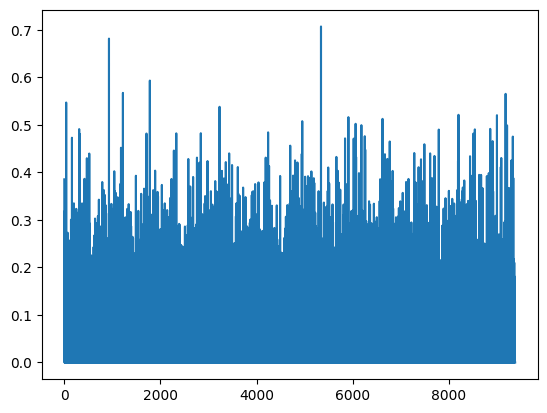

In [13]:
def train():
    loss_arr = torch.zeros(num_epochs * len(trainloader))
    for epoch in trange(num_epochs):
        printm()
        for batch_idx,(img,label) in enumerate(trainloader):
            
            # Get Data to CUDA if possible
            data = img.to(device=device)
            target = label.to(device=device)
            
            # Get to correct shape
            data = data.reshape(data.shape[0],-1) # reshape from torch.Size([64, 1, 28, 28])  torch.Size([64, 784]) which flattens the input

            # Forward
            score = model(data)
            loss = loss_fn(score,target)
            loss_arr[num_epochs* batch_idx] = np.float64(loss)
            # Backward
            optimizer.zero_grad() # set the gradient to zero before recaculation in this step (which would be relevant for RNNs)
            loss.backward() # do backpropagation
            
            # Gradient Descent or Adam Step
            optimizer.step() 
    
    plt.plot(loss_arr)
train()

In [14]:
# Check Accuracy
def check_accuracy(loader,model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x,y in loader:
            x = x.to(device = device)
            y = y.to(device = device)
            
            x = x.reshape(x.shape[0],-1)
            
            scores = model(x)
            _,predictions = scores.max(1)
            '''
            Index weil 10 ausgaben pseuowahrscheinlichkeit ist zugeordent durch cross entropy max 
            damit größter wert == bestes ergebnis und da die ordnung gleich ist also von lable und output ist der index == lable
            '''
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")
    model.train()

check_accuracy(trainloader, model) # die hat er schon gesehen 
check_accuracy(testloader, model) #diese bilder hat er noch nicht gesehen 

Got 53697 / 60000 with accuracy 89.50
Got 8645 / 10000 with accuracy 86.45
